In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 87 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.8 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638600 sha256=bb6064ea69a31b30b105addef2e20334074dfbe19586dae0e31bcf76aeed44f4
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.4
    Uninstalling cmdstanpy-1.0.4:
      Successfully uninstalled cmdstanpy-1.0.4
ERROR: pip's dependency resolver does not currently take into account all the p

In [ ]:
from prophet import Prophet
from matplotlib import pyplot as plt
import logging
import pandas as pd
import numpy as np
import warnings

By default Prophet fits additive seasonalities, meaning the effect of the seasonality is added to the trend to get the forecast. This time series of the number of air passengers is an example of when additive seasonality does not work:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv')

In [ ]:
df

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


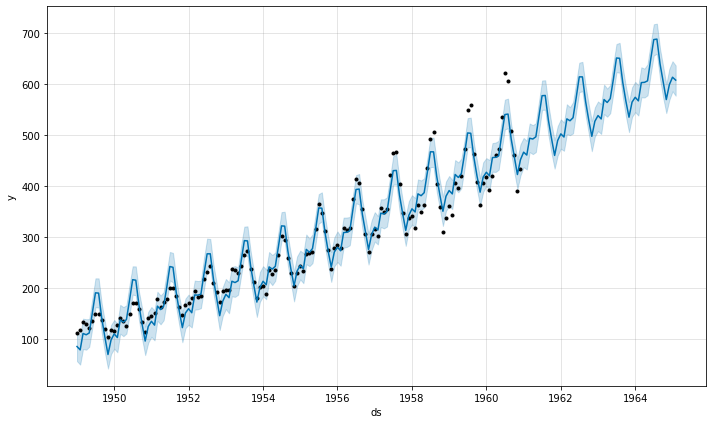

In [ ]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

This time series has a clear yearly cycle, but the seasonality in the forecast is too large at the start of the time series and too small at the end. In this time series, the seasonality is not a constant additive factor as assumed by Prophet, rather it grows with the trend. This is multiplicative seasonality.

Prophet can model multiplicative seasonality by setting seasonality_mode='multiplicative' in the input arguments:

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


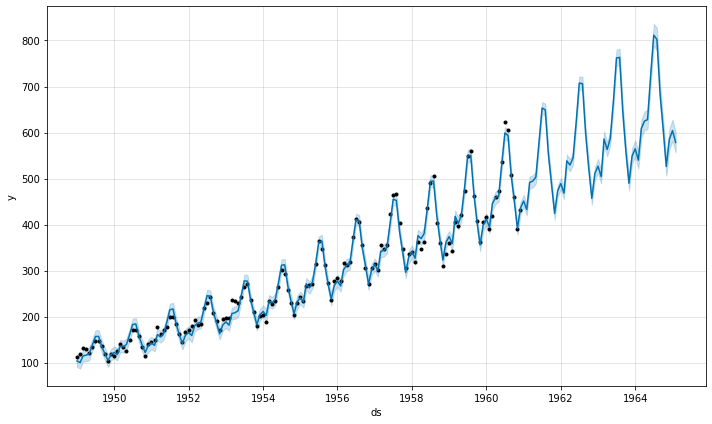

In [ ]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)

In [ ]:
forecast.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
184,1964-05-01,635.683110,607.791037,649.402500,620.179022,652.160420,-0.012086,-0.012086,-0.012086,-0.012086,-0.012086,-0.012086,0.0,0.0,0.0,628.000370
185,1964-06-01,639.254232,702.267157,748.324411,623.048731,656.234848,0.133603,0.133603,0.133603,0.133603,0.133603,0.133603,0.0,0.0,0.0,724.660622
186,1964-07-01,642.710157,788.154268,836.603515,625.774810,660.212549,0.262910,0.262910,0.262910,0.262910,0.262910,0.262910,0.0,0.0,0.0,811.685065
187,1964-08-01,646.281279,778.784515,827.787257,628.699190,664.133915,0.241571,0.241571,0.241571,0.241571,0.241571,0.241571,0.0,0.0,0.0,802.403867
188,1964-09-01,649.852401,660.937242,707.826055,631.668891,668.477276,0.052575,0.052575,0.052575,0.052575,0.052575,0.052575,0.0,0.0,0.0,684.018280
189,1964-10-01,653.308326,586.973862,631.821174,634.490475,672.725967,-0.067905,-0.067905,-0.067905,-0.067905,-0.067905,-0.067905,0.0,0.0,0.0,608.945623
190,1964-11-01,656.879448,506.147415,546.119440,637.400313,677.111533,-0.198882,-0.198882,-0.198882,-0.198882,-0.198882,-0.198882,0.0,0.0,0.0,526.238105
191,1964-12-01,660.335373,563.481326,607.841026,640.404406,681.213079,-0.114211,-0.114211,-0.114211,-0.114211,-0.114211,-0.114211,0.0,0.0,0.0,584.917685
192,1965-01-01,663.906495,581.841394,628.306210,643.348577,685.344549,-0.089711,-0.089711,-0.089711,-0.089711,-0.089711,-0.089711,0.0,0.0,0.0,604.346663
193,1965-02-01,667.477618,556.601453,601.131898,646.374625,689.478686,-0.133401,-0.133401,-0.133401,-0.133401,-0.133401,-0.133401,0.0,0.0,0.0,578.435751


The components figure will now show the seasonality as a percent of the trend:

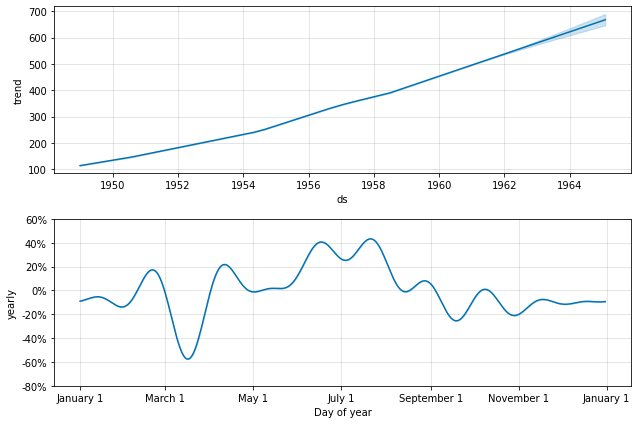

In [ ]:
fig = m.plot_components(forecast)

It is possible to save fitted Prophet model to json:

In [ ]:
from prophet.serialize import model_to_json, model_from_json

with open('serialized_model.json', 'w') as fout:
    fout.write(model_to_json(m))  # Save model

with open('serialized_model.json', 'r') as fin:
    m = model_from_json(fin.read())  # Load model